In [452]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, recall_score, precision_score


In [453]:
dataframe = pd.read_csv("survey_results_public 22.csv")

In [454]:
# the goal of this project would be to see if it is possible to predict the orgnization size of where developers work at
# based on various data inputs that will be decided based on whether or not there is a correlation between certain data 

# The data source for this project is the "Stack Overflow Annual Developer Survey". Specifically, I'll be using the 2022 data to train the model
# and then test the resulted trained model on the 23 data.

# To acheive this, I'll check what coloumns are common between the '22' and the '23' survey results. Then, the model, once selected based on data
# understanding, will be trained on the '22' data and then tested on the '23' data.
    

# initial comparison between the two years was done to see which columns were common, there are 63 common coloumns. Of coures, any 
# coloumns that are dropped here for the '22' data in the coures of the data cleaning and preperation would also be dropped in the 
# '23' data to ensure correct measure of the model accuracy that would be based on factors other than the data (i.e., hyber parameters adjustments).

In [455]:
# --------------------------------------------------------
# I will start with "Data Understanding"
# --------------------------------------------------------

dataframe

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


In [456]:
# 1st remove the uncommon columns between 22 & 23 data from the 22 columns, the 23 uncommon columns will be removed later. 
dataframe = dataframe.drop(['CompFreq', 'VersionControlSystem', 'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use', 'Blockchain'],axis=1)
dataframe = dataframe.drop(['Gender', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth'],axis=1)
dataframe = dataframe.drop(['Onboarding', 'TrueFalse_1', 'TrueFalse_2', 'TrueFalse_3'],axis=1)




In [457]:
dataframe.describe()
# getting a basic understanding of the dataset

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,8.706850,7.814132e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,50.000000,5.000000e+07


In [458]:
dataframe.isnull().sum()
# seeing if there  are any null values in the dataset

ResponseId                 0
MainBranch                 0
Employment              1559
RemoteWork             14310
CodingActivities       14369
                       ...  
TimeAnswering          37246
ProfessionalTech       38362
SurveyLength            2824
SurveyEase              2760
ConvertedCompYearly    35197
Length: 64, dtype: int64

In [459]:
dataframe.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [460]:
dataframe.nunique()

ResponseId             73268
MainBranch                 6
Employment               103
RemoteWork                 3
CodingActivities          63
                       ...  
TimeAnswering              5
ProfessionalTech         155
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     7909
Length: 64, dtype: int64

In [461]:
# for col in dataframe.columns:
#     print(f"Unique values in '{col}':")
#     print(dataframe[col].unique())
#     print()
#     print()
#     print()


In [462]:
# some cols have nan only and some cols have low unique values and some have high unique values. 
# this analysis is important as to decide ho w to proceed with data selection, cleaning, and conversion of data. 

In [463]:
# For now, the following string coloumns can be turned into numrical values: 
# MainBranch
# Employment
# EdLevel
# YearsCode (already a number value that needs its type to be changed to int)
# OpSysProfessional use
# OpSysPersonal use
# VCInteraction
# Blockchain
# NEWSOSites
# SOVisitFreq
# SOAccount
# Age
# Accessibility
# MentalHealth


# It was noted that some of the columns don't have that many unique values such as employement, rather, they have different combinations of a 
# small number of unique values which results in a big number of the unique values count.

In [464]:
for col in dataframe.columns:
    print(f"Number of unique values in '{col}' is: '{dataframe[col].nunique()}':")

Number of unique values in 'ResponseId' is: '73268':
Number of unique values in 'MainBranch' is: '6':
Number of unique values in 'Employment' is: '103':
Number of unique values in 'RemoteWork' is: '3':
Number of unique values in 'CodingActivities' is: '63':
Number of unique values in 'EdLevel' is: '9':
Number of unique values in 'LearnCode' is: '737':
Number of unique values in 'LearnCodeOnline' is: '7192':
Number of unique values in 'LearnCodeCoursesCert' is: '206':
Number of unique values in 'YearsCode' is: '52':
Number of unique values in 'YearsCodePro' is: '52':
Number of unique values in 'DevType' is: '9984':
Number of unique values in 'OrgSize' is: '10':
Number of unique values in 'PurchaseInfluence' is: '3':
Number of unique values in 'BuyNewTool' is: '125':
Number of unique values in 'Country' is: '180':
Number of unique values in 'Currency' is: '142':
Number of unique values in 'CompTotal' is: '3179':
Number of unique values in 'LanguageHaveWorkedWith' is: '25068':
Number of u

In [465]:
# The decision to make about the data frame based on the initial analysis of the data frame so far:
# coloumns with zero unique values would be dropped
# coloumns with above 15% 'nan' values would be dropped
# columns with too many unique values would be dropped in case they weren't numerical and there was no way to utalize as a categorical data


In [466]:
# I have decided that the "Y" value would be the "orgsize", as this would be an interesting output to predict and since it is a value that 
# exists in both the 22 and 23 survey results. 

# Also the value here in all of the data set consists only of 10 values in total, which means, a classifier or some other model can be used for this 
# as the data is not numerical or continues in nature

In [467]:
# getting the precentage of nan values
##############################################
for col in dataframe.columns:
    print(f"precentage of NaN values in '{col}' is: '{dataframe[col].isnull().mean() * 100}':")

precentage of NaN values in 'ResponseId' is: '0.0':
precentage of NaN values in 'MainBranch' is: '0.0':
precentage of NaN values in 'Employment' is: '2.127804771523721':
precentage of NaN values in 'RemoteWork' is: '19.531036741824533':
precentage of NaN values in 'CodingActivities' is: '19.611563028880276':
precentage of NaN values in 'EdLevel' is: '2.3161543920947754':
precentage of NaN values in 'LearnCode' is: '2.3038707211879674':
precentage of NaN values in 'LearnCodeOnline' is: '30.822460009826933':
precentage of NaN values in 'LearnCodeCoursesCert' is: '59.88835507998035':
precentage of NaN values in 'YearsCode' is: '2.643718949609652':
precentage of NaN values in 'YearsCodePro' is: '29.255609543047445':
precentage of NaN values in 'DevType' is: '16.33182289676257':
precentage of NaN values in 'OrgSize' is: '30.339302287492494':
precentage of NaN values in 'PurchaseInfluence' is: '30.434841950101':
precentage of NaN values in 'BuyNewTool' is: '7.240541573401758':
precentage of 

In [468]:
# Dropping columns with more than 15% nan values
dataframe = dataframe.dropna(axis=1, thresh = len(dataframe) - (len(dataframe) * 0.15))

In [469]:
# getting the precentage of nan value with less than 15% nan values
for col in dataframe.columns:
    print(f"precentage of NaN values in '{col}' is: '{dataframe[col].isnull().mean() * 100}':")

precentage of NaN values in 'ResponseId' is: '0.0':
precentage of NaN values in 'MainBranch' is: '0.0':
precentage of NaN values in 'Employment' is: '2.127804771523721':
precentage of NaN values in 'EdLevel' is: '2.3161543920947754':
precentage of NaN values in 'LearnCode' is: '2.3038707211879674':
precentage of NaN values in 'YearsCode' is: '2.643718949609652':
precentage of NaN values in 'BuyNewTool' is: '7.240541573401758':
precentage of NaN values in 'Country' is: '2.0431839274990446':
precentage of NaN values in 'LanguageHaveWorkedWith' is: '3.129606376590053':
precentage of NaN values in 'LanguageWantToWorkWith' is: '8.518043347709778':
precentage of NaN values in 'NEWCollabToolsHaveWorkedWith' is: '3.9867336354206473':
precentage of NaN values in 'NEWCollabToolsWantToWorkWith' is: '12.502047278484469':
precentage of NaN values in 'OpSysProfessional use' is: '10.598078287929246':
precentage of NaN values in 'OpSysPersonal use' is: '3.1459846044657973':
precentage of NaN values in

In [470]:
##############################################  already removed above so it is not needed
# dataframe = dataframe.drop(['Sexuality', 'Ethnicity', 'Gender'],axis=1)

In [471]:
dataframe

,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,OpSysProfessional use,OpSysPersonal use,NEWSOSites,SOVisitFreq,SOAccount,SOComm,Age,z,SurveyLength,SurveyEase
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",NaN,NaN,NaN,NaN,Canada,JavaScript;TypeScript,Rust;TypeScript,...,macOS,Windows Subsystem for Linux (WSL),Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Not sure,NaN,NaN,Too long,Difficult
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,14,NaN,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,...,Windows,Windows,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Neutral,25-34 years old,No,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",20,Other (please specify):,Israel,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,...,Windows,Windows,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,"Yes, definitely",35-44 years old,No,Appropriate in length,Easy
4,5,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",8,Start a free trial;Visit developer communities...,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,...,Windows,macOS;Windows,Collectives on Stack Overflow;Stack Overflow f...,Multiple times per day,Yes,"Yes, definitely",25-34 years old,NaN,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,8,Visit developer communities like Stack Overflo...,Nigeria,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,...,macOS,Linux-based;macOS,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,"Yes, definitely",25-34 years old,No,Too long,Easy
73264,73265,I am a developer by profession,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",6,Other (please specify):;Ask developers I know/...,United States of America,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,...,Linux-based;Windows,Linux-based;Windows,Stack Overflow,Daily or almost daily,Not sure/can't remember,Neutral,25-34 years old,No,Too long,Easy
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,42,Start a free trial;Ask developers I know/work ...,United States of America,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,...,Windows,Windows,Stack Overflow;Stack Exchange,Multiple times per day,Yes,"Yes, somewhat",55-64 years old,No,Appropriate in length,Easy
73266,73267,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,50,Start a free trial;Visit developer communities...,United Kingdom of Great Britain and Northern I...,C#;Delphi;VBA,Delphi,...,Windows,Windows,Stack Overflow,Daily or almost daily,Yes,"No, not at all",55-64 years old,No,Appropriate in length,Easy


In [472]:
for col in dataframe.columns:
    print(f"Number of unique values in '{col}' is: '{dataframe[col].nunique()}':")

Number of unique values in 'ResponseId' is: '73268':
Number of unique values in 'MainBranch' is: '6':
Number of unique values in 'Employment' is: '103':
Number of unique values in 'EdLevel' is: '9':
Number of unique values in 'LearnCode' is: '737':
Number of unique values in 'YearsCode' is: '52':
Number of unique values in 'BuyNewTool' is: '125':
Number of unique values in 'Country' is: '180':
Number of unique values in 'LanguageHaveWorkedWith' is: '25068':
Number of unique values in 'LanguageWantToWorkWith' is: '23952':
Number of unique values in 'NEWCollabToolsHaveWorkedWith' is: '15063':
Number of unique values in 'NEWCollabToolsWantToWorkWith' is: '9188':
Number of unique values in 'OpSysProfessional use' is: '55':
Number of unique values in 'OpSysPersonal use' is: '56':
Number of unique values in 'NEWSOSites' is: '16':
Number of unique values in 'SOVisitFreq' is: '5':
Number of unique values in 'SOAccount' is: '3':
Number of unique values in 'SOComm' is: '6':
Number of unique valu

In [473]:
dataframe.dtypes
# it can be noted that all of the types are non-numerical now, it needs to be changed before the data can be further used and 
# fitted in a model.

ResponseId                       int64
MainBranch                      object
Employment                      object
EdLevel                         object
LearnCode                       object
YearsCode                       object
BuyNewTool                      object
Country                         object
LanguageHaveWorkedWith          object
LanguageWantToWorkWith          object
NEWCollabToolsHaveWorkedWith    object
NEWCollabToolsWantToWorkWith    object
OpSysProfessional use           object
OpSysPersonal use               object
NEWSOSites                      object
SOVisitFreq                     object
SOAccount                       object
SOComm                          object
Age                             object
z                               object
SurveyLength                    object
SurveyEase                      object
dtype: object

In [474]:
dataframe.info()
# there are still some null vaules in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    73268 non-null  int64 
 1   MainBranch                    73268 non-null  object
 2   Employment                    71709 non-null  object
 3   EdLevel                       71571 non-null  object
 4   LearnCode                     71580 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    67963 non-null  object
 7   Country                       71771 non-null  object
 8   LanguageHaveWorkedWith        70975 non-null  object
 9   LanguageWantToWorkWith        67027 non-null  object
 10  NEWCollabToolsHaveWorkedWith  70347 non-null  object
 11  NEWCollabToolsWantToWorkWith  64108 non-null  object
 12  OpSysProfessional use         65503 non-null  object
 13  OpSysPersonal us

In [475]:
dataframe = dataframe.dropna(subset=['YearsCode'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71280 non-null  object
 3   EdLevel                       71204 non-null  object
 4   LearnCode                     71237 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    67695 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  69999 non-null  object
 11  NEWCollabToolsWantToWorkWith  63810 non-null  object
 12  OpSysProfessional use         65196 non-null  object
 13  OpSysPersonal use    

In [476]:

# dataframe['YearsCode'] = dataframe['YearsCode'].astype('str')
# dataframe['YearsCode'] = dataframe['YearsCode'].str.replace('Less than 1 year', '0')
# dataframe['YearsCode'] = dataframe['YearsCode'].str.replace('Less than 1 year', '0')
# dataframe['YearsCode'] = dataframe['YearsCode'].str.replace('More than 50 years', '51')

# Changing these values to numbers in the 'Yearscode' column which is our Y. 
dataframe.loc[:, 'YearsCode'] = dataframe['YearsCode'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
# dataframe.loc[:, 'YearsCode'] = pd.to_numeric(dataframe['YearsCode'], errors='coerce')
# dataframe['YearsCode'] = dataframe['YearsCode'].astype('int64')

# converting Y value to string type
dataframe.loc[:,'YearsCode'] = dataframe['YearsCode'].astype('str')

# converting the X values to string type
dataframe.loc[:,'Age'] = dataframe['Age'].astype('str')
dataframe.loc[:,'SOComm'] = dataframe['SOComm'].astype('str')
dataframe.loc[:,'SOAccount'] = dataframe['SOAccount'].astype('str')
dataframe.loc[:,'SOVisitFreq'] = dataframe['SOVisitFreq'].astype('str')
dataframe.loc[:,'NEWSOSites'] = dataframe['NEWSOSites'].astype('str')
dataframe.loc[:,'SOVisitFreq'] = dataframe['SOVisitFreq'].astype('str')
dataframe.loc[:,'NEWSOSites'] = dataframe['NEWSOSites'].astype('str')
dataframe.loc[:,'OpSysProfessional use'] = dataframe['OpSysProfessional use'].astype('str')
dataframe.loc[:,'OpSysPersonal use'] = dataframe['OpSysPersonal use'].astype('str')
dataframe.loc[:,'Country'] = dataframe['Country'].astype('str')
dataframe.loc[:,'BuyNewTool'] = dataframe['BuyNewTool'].astype('str')
dataframe.loc[:,'LearnCode'] = dataframe['LearnCode'].astype('str')
dataframe.loc[:,'EdLevel'] = dataframe['EdLevel'].astype('str')
dataframe.loc[:,'Employment'] = dataframe['Employment'].astype('str')
dataframe.loc[:,'MainBranch'] = dataframe['MainBranch'].astype('str')


# dataframe['Age'] = dataframe['Age'].astype('str')
# dataframe['SOComm'] = dataframe['SOComm'].astype('str')
# dataframe['SOAccount'] = dataframe['SOAccount'].astype('str')
# dataframe['SOVisitFreq'] = dataframe['SOVisitFreq'].astype('str')
# dataframe['NEWSOSites'] = dataframe['NEWSOSites'].astype('str')
# dataframe['SOVisitFreq'] = dataframe['SOVisitFreq'].astype('str')
# dataframe['NEWSOSites'] = dataframe['NEWSOSites'].astype('str')
# dataframe['OpSysProfessional use'] = dataframe['OpSysProfessional use'].astype('str')
# dataframe['OpSysPersonal use'] = dataframe['OpSysPersonal use'].astype('str')
# dataframe['Country'] = dataframe['Country'].astype('str')
# dataframe['BuyNewTool'] = dataframe['BuyNewTool'].astype('str')
# dataframe['LearnCode'] = dataframe['LearnCode'].astype('str')
# dataframe['EdLevel'] = dataframe['EdLevel'].astype('str')
# dataframe['Employment'] = dataframe['Employment'].astype('str')
# dataframe['MainBranch'] = dataframe['MainBranch'].astype('str')


# this coloumn has no meaning, so I am dropping it. 
dataframe = dataframe.drop(['z'], axis=1)

In [477]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71331 non-null  object
 3   EdLevel                       71331 non-null  object
 4   LearnCode                     71331 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    71331 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  69999 non-null  object
 11  NEWCollabToolsWantToWorkWith  63810 non-null  object
 12  OpSysProfessional use         71331 non-null  object
 13  OpSysPersonal use    

In [478]:
dataframe.info()

# SEE LATER IF THE MODEL ACCURACY DIFFERES HERE BSAED ON THESE COLUMNS:
# These columns will be dropped as they have no direct relationship on the targeted 'y' value here 
# and are relevant to the servey improvement themselves 
# dataframe = dataframe.drop(['SurveyLength'], axis=1)
# dataframe = dataframe.drop(['SurveyEase'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 2 to 73267
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    71331 non-null  int64 
 1   MainBranch                    71331 non-null  object
 2   Employment                    71331 non-null  object
 3   EdLevel                       71331 non-null  object
 4   LearnCode                     71331 non-null  object
 5   YearsCode                     71331 non-null  object
 6   BuyNewTool                    71331 non-null  object
 7   Country                       71331 non-null  object
 8   LanguageHaveWorkedWith        70593 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  69999 non-null  object
 11  NEWCollabToolsWantToWorkWith  63810 non-null  object
 12  OpSysProfessional use         71331 non-null  object
 13  OpSysPersonal use    

In [479]:
#################################################################################
# change the below code later if you want to see any alternative results

In [480]:
dataframe = dataframe.dropna(subset=['LanguageHaveWorkedWith'])
dataframe = dataframe.dropna(subset=['LanguageWantToWorkWith'])

# replacing the nan values with the mode of the column
dataframe['NEWCollabToolsHaveWorkedWith'] = dataframe['NEWCollabToolsHaveWorkedWith'].fillna(dataframe['NEWCollabToolsHaveWorkedWith'].mode().iloc[0])
dataframe['NEWCollabToolsWantToWorkWith'] = dataframe['NEWCollabToolsWantToWorkWith'].fillna(dataframe['NEWCollabToolsWantToWorkWith'].mode().iloc[0])


dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66698 entries, 2 to 73267
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    66698 non-null  int64 
 1   MainBranch                    66698 non-null  object
 2   Employment                    66698 non-null  object
 3   EdLevel                       66698 non-null  object
 4   LearnCode                     66698 non-null  object
 5   YearsCode                     66698 non-null  object
 6   BuyNewTool                    66698 non-null  object
 7   Country                       66698 non-null  object
 8   LanguageHaveWorkedWith        66698 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  66698 non-null  object
 11  NEWCollabToolsWantToWorkWith  66698 non-null  object
 12  OpSysProfessional use         66698 non-null  object
 13  OpSysPersonal use    

In [481]:
# Split the 'LanguageHaveWorkedWith' & 'LanguageWantToWorkWith' columns into multiple new columns
split_cols1 = dataframe['LanguageHaveWorkedWith'].str.split(';', expand=True)
# split_cols2 = dataframe['LanguageWantToWorkWith'].str.split(';', expand=True)

# Rename the new columns
split_cols1.columns = [f'LanguageHaveWorkedWith_{i+1}' for i in range(split_cols1.shape[1])]
# split_cols2.columns = [f'LanguageWantToWorkWith_{i+1}' for i in range(split_cols2.shape[1])]

# Combine the columns back into original DataFrame
dataframe = pd.concat([dataframe, split_cols1], axis=1)
# dataframe = pd.concat([dataframe, split_cols2], axis=1)


In [482]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 66698 entries, 2 to 73267
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    66698 non-null  int64 
 1   MainBranch                    66698 non-null  object
 2   Employment                    66698 non-null  object
 3   EdLevel                       66698 non-null  object
 4   LearnCode                     66698 non-null  object
 5   YearsCode                     66698 non-null  object
 6   BuyNewTool                    66698 non-null  object
 7   Country                       66698 non-null  object
 8   LanguageHaveWorkedWith        66698 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  66698 non-null  object
 11  NEWCollabToolsWantToWorkWith  66698 non-null  object
 12  OpSysProfessional use         66698 non-null  object
 13  OpSysPersonal use    

In [483]:
# showing how many empty values in the columns we created.
# for col in dataframe.columns:
    # print(f"precentage of NaN values in '{col}' is: '{dataframe[col].isnull().mean() * 100}':")

In [484]:
dataframe = dataframe.dropna(axis=1, thresh = len(dataframe) - (len(dataframe) * 0.5))

dataframe.head()

,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,SOAccount,SOComm,Age,SurveyLength,SurveyEase,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,14,nan,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,...,Yes,Neutral,25-34 years old,Appropriate in length,Neither easy nor difficult,C#,C++,HTML/CSS,JavaScript,Python
3,4,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",20,Other (please specify):,Israel,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,...,Yes,"Yes, definitely",35-44 years old,Appropriate in length,Easy,C#,JavaScript,SQL,TypeScript,None
4,5,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",8,Start a free trial;Visit developer communities...,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,...,Yes,"Yes, definitely",25-34 years old,Too long,Easy,C#,HTML/CSS,JavaScript,SQL,Swift
5,6,"I am not primarily a developer, but I write co...","Student, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",15,Other (please specify):,Germany,C++;Lua,Lua,...,Yes,"Yes, definitely",25-34 years old,Appropriate in length,Easy,C++,Lua,None,None,None
6,7,I code primarily as a hobby,"Student, part-time","Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",3,Start a free trial;Visit developer communities...,India,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,C;C#;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Ko...,...,Yes,"Yes, definitely",Under 18 years old,Appropriate in length,Easy,C++,HTML/CSS,JavaScript,PHP,Python


In [485]:

unique_langauge_values = dataframe['LanguageHaveWorkedWith_1'].unique().tolist() + dataframe['LanguageHaveWorkedWith_2'].unique().tolist() + dataframe['LanguageHaveWorkedWith_3'].unique().tolist() + dataframe['LanguageHaveWorkedWith_4'].unique().tolist() + dataframe['LanguageHaveWorkedWith_5'].unique().tolist()

# creating an encoder
# encoder = OneHotEncoder(sparse=False)

# encoded = encoder.fit_transform(dataframe)

In [486]:
print(unique_langauge_values)

['C#', 'C++', 'C', 'Delphi', 'Bash/Shell', 'Elixir', 'HTML/CSS', 'Python', 'VBA', 'Dart', 'MATLAB', 'JavaScript', 'Java', 'Haskell', 'Assembly', 'Groovy', 'Go', 'APL', 'Crystal', 'PHP', 'Clojure', 'Erlang', 'Rust', 'Ruby', 'Perl', 'Kotlin', 'TypeScript', 'SQL', 'Lua', 'COBOL', 'PowerShell', 'LISP', 'Scala', 'Objective-C', 'F#', 'Swift', 'Julia', 'Fortran', 'OCaml', 'R', 'Solidity', 'SAS', 'C++', 'JavaScript', 'HTML/CSS', 'Lua', 'Java', 'C#', 'Erlang', 'SQL', 'PowerShell', None, 'Go', 'Groovy', 'Python', 'TypeScript', 'C', 'Bash/Shell', 'Clojure', 'R', 'PHP', 'Kotlin', 'Julia', 'LISP', 'Rust', 'Haskell', 'Scala', 'Dart', 'Delphi', 'Elixir', 'VBA', 'Swift', 'Perl', 'MATLAB', 'Assembly', 'Objective-C', 'F#', 'Ruby', 'Crystal', 'COBOL', 'OCaml', 'Fortran', 'SAS', 'Solidity', 'HTML/CSS', 'SQL', 'JavaScript', None, 'Swift', 'Rust', 'PHP', 'Java', 'TypeScript', 'PowerShell', 'Python', 'C++', 'C', 'Kotlin', 'Go', 'Delphi', 'F#', 'Ruby', 'Groovy', 'VBA', 'C#', 'Perl', 'Scala', 'Dart', 'Erlang',

In [487]:
# mapping languages to different numerical values:
language_map = {None: 0}

for value in unique_langauge_values:
    if value not in language_map:
        language_map[value] = len(language_map)


In [488]:
print(language_map)

{None: 0, 'C#': 1, 'C++': 2, 'C': 3, 'Delphi': 4, 'Bash/Shell': 5, 'Elixir': 6, 'HTML/CSS': 7, 'Python': 8, 'VBA': 9, 'Dart': 10, 'MATLAB': 11, 'JavaScript': 12, 'Java': 13, 'Haskell': 14, 'Assembly': 15, 'Groovy': 16, 'Go': 17, 'APL': 18, 'Crystal': 19, 'PHP': 20, 'Clojure': 21, 'Erlang': 22, 'Rust': 23, 'Ruby': 24, 'Perl': 25, 'Kotlin': 26, 'TypeScript': 27, 'SQL': 28, 'Lua': 29, 'COBOL': 30, 'PowerShell': 31, 'LISP': 32, 'Scala': 33, 'Objective-C': 34, 'F#': 35, 'Swift': 36, 'Julia': 37, 'Fortran': 38, 'OCaml': 39, 'R': 40, 'Solidity': 41, 'SAS': 42}


In [489]:
# Changing the categorical data to a numerical one based on the mapping we created
dataframe.loc[:,'LanguageHaveWorkedWith_1'] = dataframe['LanguageHaveWorkedWith_1'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_2'] = dataframe['LanguageHaveWorkedWith_2'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_3'] = dataframe['LanguageHaveWorkedWith_3'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_4'] = dataframe['LanguageHaveWorkedWith_4'].map(language_map)
dataframe.loc[:,'LanguageHaveWorkedWith_5'] = dataframe['LanguageHaveWorkedWith_5'].map(language_map)

# checking how the new columns for the numercal data looks like.
dataframe.head()


,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,...,SOAccount,SOComm,Age,SurveyLength,SurveyEase,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,14,nan,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,...,Yes,Neutral,25-34 years old,Appropriate in length,Neither easy nor difficult,1,2,7,12,8
3,4,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",20,Other (please specify):,Israel,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,...,Yes,"Yes, definitely",35-44 years old,Appropriate in length,Easy,1,12,28,27,0
4,5,I am a developer by profession,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",8,Start a free trial;Visit developer communities...,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,...,Yes,"Yes, definitely",25-34 years old,Too long,Easy,1,7,12,28,36
5,6,"I am not primarily a developer, but I write co...","Student, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",15,Other (please specify):,Germany,C++;Lua,Lua,...,Yes,"Yes, definitely",25-34 years old,Appropriate in length,Easy,2,29,0,0,0
6,7,I code primarily as a hobby,"Student, part-time","Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",3,Start a free trial;Visit developer communities...,India,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,C;C#;C++;Elixir;Go;HTML/CSS;Java;JavaScript;Ko...,...,Yes,"Yes, definitely",Under 18 years old,Appropriate in length,Easy,2,7,12,20,8


In [490]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 66698 entries, 2 to 73267
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ResponseId                    66698 non-null  int64 
 1   MainBranch                    66698 non-null  object
 2   Employment                    66698 non-null  object
 3   EdLevel                       66698 non-null  object
 4   LearnCode                     66698 non-null  object
 5   YearsCode                     66698 non-null  object
 6   BuyNewTool                    66698 non-null  object
 7   Country                       66698 non-null  object
 8   LanguageHaveWorkedWith        66698 non-null  object
 9   LanguageWantToWorkWith        66698 non-null  object
 10  NEWCollabToolsHaveWorkedWith  66698 non-null  object
 11  NEWCollabToolsWantToWorkWith  66698 non-null  object
 12  OpSysProfessional use         66698 non-null  object
 13  OpSysPersonal use    

In [491]:
country_Map = {None: 0}

# unique_Country_values = dataframe['LanguageHaveWorkedWith_1'].unique()

for value in dataframe['Country'].unique():
    if value not in country_Map:
        country_Map[value] = len(country_Map)

# print(country_Map)

In [492]:
# Number of unique values in 'MainBranch' is: '6': DONE
# Number of unique values in 'Employment' is: '103': DONE
# Number of unique values in 'EdLevel' is: '9': DONE
# Number of unique values in 'LearnCode' is: '737': DONE
# Number of unique values in 'YearsCode' is: '52': DONE
# Number of unique values in 'BuyNewTool' is: '125': DONE
# Number of unique values in 'Country' is: '180': DONE
# Number of unique values in 'LanguageHaveWorkedWith' is: '25068': DONE
# Number of unique values in 'LanguageWantToWorkWith' is: '23952': TO DELETE
# Number of unique values in 'NEWCollabToolsHaveWorkedWith' is: '15063': TO DELETE
# Number of unique values in 'NEWCollabToolsWantToWorkWith' is: '9188': TO DELETE
# Number of unique values in 'OpSysProfessional use' is: '55': DONE
# Number of unique values in 'OpSysPersonal use' is: '56': DONE
# Number of unique values in 'NEWSOSites' is: '16': DONE
# Number of unique values in 'SOVisitFreq' is: '5': DONE
# Number of unique values in 'SOAccount' is: '3': DONE
# Number of unique values in 'SOComm' is: '6': DONE
# Number of unique values in 'Age' is: '8':
# Number of unique values in 'z' is: '4': DELETED
# Number of unique values in 'SurveyLength' is: '3': TO DELETE
# Number of unique values in 'SurveyEase' is: '3': TO DELETE

In [493]:
# Dropping the selected columns to be deleted as having them will just add more complexity to the planned model. 

dataframe = dataframe.drop(['LanguageWantToWorkWith'], axis=1)
dataframe = dataframe.drop(['NEWCollabToolsHaveWorkedWith'], axis=1)
dataframe = dataframe.drop(['NEWCollabToolsWantToWorkWith'], axis=1)
dataframe = dataframe.drop(['SurveyLength'], axis=1)
dataframe = dataframe.drop(['SurveyEase'], axis=1)

In [494]:
# creating maps for the categorical columns

In [495]:
EdLevel_Map = {None: 0}

for value in dataframe['EdLevel'].unique():
    if value not in EdLevel_Map:
        EdLevel_Map[value] = len(EdLevel_Map)
# print(EdLevel_Map)

In [496]:
MainBranch_Map = {None: 0}

for value in dataframe['MainBranch'].unique():
    if value not in MainBranch_Map:
        MainBranch_Map[value] = len(MainBranch_Map)
# print(MainBranch_Map)

In [497]:
Employment_Map = {None: 0}

for value in dataframe['Employment'].unique():
    if value not in Employment_Map:
        Employment_Map[value] = len(Employment_Map)
# print(Employment_Map)

In [498]:
LearnCode_Map = {None: 0}

for value in dataframe['LearnCode'].unique():
    if value not in LearnCode_Map:
        LearnCode_Map[value] = len(LearnCode_Map)
# print(LearnCode_Map)

In [499]:
BuyNewTool_Map = {None: 0}

for value in dataframe['BuyNewTool'].unique():
    if value not in BuyNewTool_Map:
        BuyNewTool_Map[value] = len(BuyNewTool_Map)
# print(BuyNewTool_Map)

In [500]:
OpSysProfessional_Map = {None: 0}

for value in dataframe['OpSysProfessional use'].unique():
    if value not in OpSysProfessional_Map:
        OpSysProfessional_Map[value] = len(OpSysProfessional_Map)
# print(OpSysProfessional_Map)

In [501]:
OpSysPersonal_Map = {None: 0}

for value in dataframe['OpSysPersonal use'].unique():
    if value not in OpSysPersonal_Map:
        OpSysPersonal_Map[value] = len(OpSysPersonal_Map)
# print(OpSysPersonal_Map)

In [502]:
NEWSOSites_Map = {None: 0}

for value in dataframe['NEWSOSites'].unique():
    if value not in NEWSOSites_Map:
        NEWSOSites_Map[value] = len(NEWSOSites_Map)
# print(NEWSOSites_Map)

In [503]:
SOVisitFreq_Map = {None: 0}

for value in dataframe['SOVisitFreq'].unique():
    if value not in SOVisitFreq_Map:
        SOVisitFreq_Map[value] = len(SOVisitFreq_Map)
# print(SOVisitFreq_Map)

In [504]:
SOAccount_Map = {None: 0}

for value in dataframe['SOAccount'].unique():
    if value not in SOAccount_Map:
        SOAccount_Map[value] = len(SOAccount_Map)
# print(SOAccount_Map)

In [505]:
SOComm_Map = {None: 0}

for value in dataframe['SOComm'].unique():
    if value not in SOComm_Map:
        SOComm_Map[value] = len(SOComm_Map)
# print(SOComm_Map)

In [506]:
Age_Map = {None: 0}

for value in dataframe['Age'].unique():
    if value not in Age_Map:
        Age_Map[value] = len(Age_Map)
# print(Age_Map)

In [507]:
# mapping the new numerical columns to their categorical counterparts

dataframe.loc[:,'EdLevel'] = dataframe['EdLevel'].map(EdLevel_Map)
dataframe.loc[:,'Country'] = dataframe['Country'].map(country_Map)
dataframe.loc[:,'MainBranch'] = dataframe['MainBranch'].map(MainBranch_Map)
dataframe.loc[:,'Employment'] = dataframe['Employment'].map(Employment_Map)
dataframe.loc[:,'LearnCode'] = dataframe['LearnCode'].map(LearnCode_Map)
dataframe.loc[:,'BuyNewTool'] = dataframe['BuyNewTool'].map(BuyNewTool_Map)
dataframe.loc[:,'OpSysProfessional use'] = dataframe['OpSysProfessional use'].map(OpSysProfessional_Map)
dataframe.loc[:,'OpSysPersonal use'] = dataframe['OpSysPersonal use'].map(OpSysPersonal_Map)
dataframe.loc[:,'NEWSOSites'] = dataframe['NEWSOSites'].map(NEWSOSites_Map)
dataframe.loc[:,'SOVisitFreq'] = dataframe['SOVisitFreq'].map(SOVisitFreq_Map)
dataframe.loc[:,'SOAccount'] = dataframe['SOAccount'].map(SOAccount_Map)
dataframe.loc[:,'SOComm'] = dataframe['SOComm'].map(SOComm_Map)
dataframe.loc[:,'Age'] = dataframe['Age'].map(Age_Map)


In [508]:
dataframe.head()

# need to drop "NaN" values before changing the categorical columns

,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,LanguageHaveWorkedWith,OpSysProfessional use,...,NEWSOSites,SOVisitFreq,SOAccount,SOComm,Age,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,1,1,1,1,14,1,1,C#;C++;HTML/CSS;JavaScript;Python,1,...,1,1,1,1,1,1,2,7,12,8
3,4,2,1,2,2,20,2,2,C#;JavaScript;SQL;TypeScript,1,...,2,2,1,2,2,1,12,28,27,0
4,5,2,1,2,3,8,3,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,1,...,2,1,1,2,1,1,7,12,28,36
5,6,1,2,1,2,15,2,4,C++;Lua,2,...,3,1,1,2,1,2,29,0,0,0
6,7,3,3,3,4,3,3,5,C++;HTML/CSS;JavaScript;PHP;Python;TypeScript,3,...,4,1,1,2,3,2,7,12,20,8


In [509]:
dataframe = dataframe.drop(['LanguageHaveWorkedWith'], axis=1)
dataframe.head()


,ResponseId,MainBranch,Employment,EdLevel,LearnCode,YearsCode,BuyNewTool,Country,OpSysProfessional use,OpSysPersonal use,NEWSOSites,SOVisitFreq,SOAccount,SOComm,Age,LanguageHaveWorkedWith_1,LanguageHaveWorkedWith_2,LanguageHaveWorkedWith_3,LanguageHaveWorkedWith_4,LanguageHaveWorkedWith_5
2,3,1,1,1,1,14,1,1,1,1,1,1,1,1,1,1,2,7,12,8
3,4,2,1,2,2,20,2,2,1,1,2,2,1,2,2,1,12,28,27,0
4,5,2,1,2,3,8,3,3,1,2,2,1,1,2,1,1,7,12,28,36
5,6,1,2,1,2,15,2,4,2,3,3,1,1,2,1,2,29,0,0,0
6,7,3,3,3,4,3,3,5,3,3,4,1,1,2,3,2,7,12,20,8


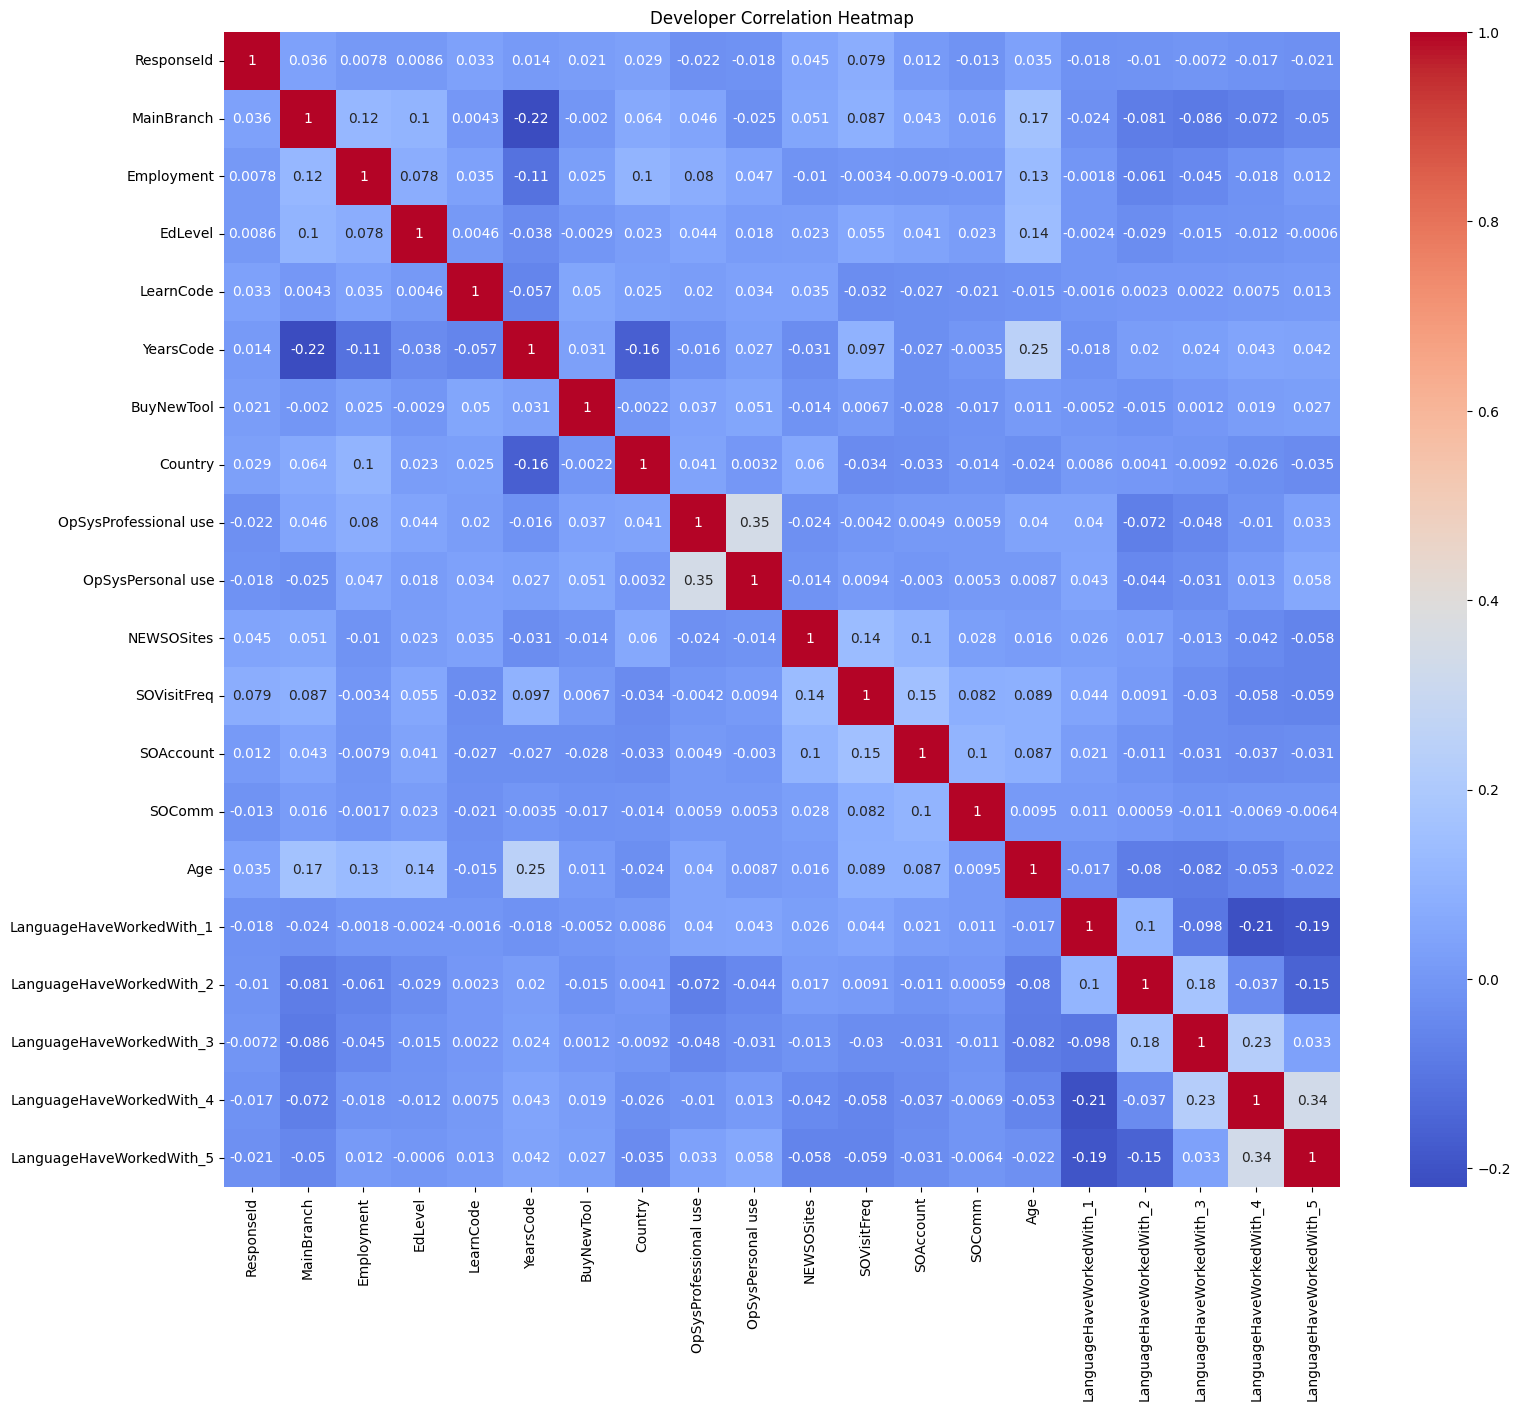

In [510]:
plt.figure(figsize=(18,15))
sns.heatmap(dataframe.corr(numeric_only=False), annot=True, cmap='coolwarm')
plt.title("Developer Correlation Heatmap")
plt.show()

In [511]:
y = dataframe['YearsCode']
X = dataframe.drop('YearsCode', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

# Create a decision tree regressor object
dt_regressor = DecisionTreeRegressor(random_state=50)

# Train the model using the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_regressor.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 58.06256871564218


In [512]:
y_test = list(map(str, y_test))
# y_test = list(y_test)

y_pred = list(map(int, y_pred))
y_pred = list(map(str, y_pred))
# y_pred = list(y_pred)

In [513]:
# print(y_test)

['10', '4', '14', '10', '5', '8', '15', '6', '8', '8', '28', '3', '10', '13', '13', '9', '7', '4', '10', '7', '9', '8', '5', '1', '4', '6', '25', '3', '6', '10', '2', '4', '18', '31', '31', '4', '20', '2', '5', '0', '25', '10', '22', '20', '10', '6', '33', '6', '9', '7', '3', '15', '9', '5', '15', '3', '19', '33', '40', '5', '2', '20', '14', '32', '10', '5', '33', '16', '5', '3', '2', '4', '2', '10', '3', '3', '15', '10', '28', '4', '3', '12', '11', '4', '7', '40', '4', '17', '7', '5', '3', '24', '2', '10', '8', '16', '12', '7', '3', '13', '8', '4', '14', '7', '7', '1', '8', '6', '23', '37', '3', '0', '5', '12', '12', '20', '8', '12', '30', '7', '2', '12', '8', '6', '9', '4', '20', '6', '4', '7', '20', '4', '29', '15', '19', '5', '4', '3', '11', '8', '5', '42', '2', '40', '1', '2', '15', '2', '8', '7', '12', '15', '7', '12', '22', '38', '25', '26', '14', '10', '40', '30', '32', '2', '4', '13', '4', '2', '4', '9', '37', '35', '30', '10', '10', '15', '17', '15', '5', '4', '20', '14', '8'

In [514]:
# print(y_pred)

['24', '4', '5', '10', '4', '6', '10', '2', '7', '20', '24', '7', '8', '9', '20', '2', '20', '13', '4', '12', '11', '7', '4', '1', '3', '8', '13', '12', '12', '13', '0', '4', '15', '20', '26', '5', '10', '4', '13', '1', '46', '4', '26', '27', '1', '8', '25', '14', '13', '6', '9', '30', '11', '6', '11', '9', '15', '27', '35', '4', '2', '5', '20', '26', '2', '13', '12', '20', '3', '5', '4', '9', '3', '12', '5', '10', '6', '8', '44', '6', '4', '11', '4', '7', '7', '40', '12', '9', '15', '6', '2', '26', '3', '4', '3', '11', '5', '9', '6', '18', '13', '8', '10', '7', '4', '2', '7', '10', '16', '17', '7', '0', '1', '8', '19', '15', '8', '16', '40', '6', '2', '22', '7', '2', '7', '13', '8', '2', '7', '13', '30', '4', '36', '20', '30', '30', '22', '3', '8', '6', '6', '43', '4', '22', '10', '2', '23', '4', '17', '6', '14', '8', '3', '9', '6', '38', '25', '14', '11', '17', '30', '43', '33', '5', '4', '23', '2', '4', '18', '3', '40', '15', '37', '15', '8', '5', '12', '20', '4', '10', '27', '14', 

In [515]:
# measuring the precision of the model

F1Score = f1_score(y_test, y_pred, average = 'micro')
print("model F1 Score is: ", F1Score)

model F1 Score is:  0.08935532233883059


In [516]:
# measuring the Recall of the model

Recall = recall_score(y_test, y_pred, average = 'micro')
print("model Recall score is: ", Recall)

model Recall score is:  0.08935532233883059


In [517]:
# measuring the F1 Score of the model

precision = precision_score(y_test, y_pred, average = 'micro')
print("model precision is: ", precision)

model precision is:  0.08935532233883059


In [ ]:
# review of the model and data to be done for futher improving the results. 